In [1]:
import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from pyearth import Earth
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/Users/xizheng/Documents/florin/respiration/K1/K1_20191226_r0_traces.mat"
Traces = sio.loadmat(filepath)['Traces']

idx = 18

In [3]:
lever = Traces[0,0]['Lever'][0,idx].flatten()
lever = savgol_filter(lever, 25, 4)

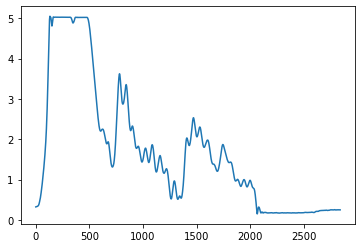

In [4]:
plt.plot(lever)
plt.show()

In [5]:
x = np.arange(len(lever))
    
#Fit an Earth model
model = Earth(thresh=1e-5, minspan=30, penalty=10.0, check_every=1, verbose=True)
model.fit(x,lever)
#Print the model
# print(model.trace())
# print(model.summary())

Beginning forward pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     2.488745  1      2.490  0.000  0.000  
1     0       0    135   0.607258  3      0.613  0.756  0.754  
2     0       0    941   0.338177  5      0.344  0.864  0.862  
3     0       0    104   0.297863  7      0.306  0.880  0.877  
4     0       0    1561  0.278705  9      0.289  0.888  0.884  
5     0       0    2243  0.248344  11     0.259  0.900  0.896  
6     0       0    1313  0.201922  13     0.213  0.919  0.915  
7     0       0    693   0.181552  15     0.193  0.927  0.923  
8     0       0    445   0.120606  17     0.129  0.952  0.948  
9     0       0    786   0.059053  19     0.064  0.976  0.974  
10    0       0    1468  0.043633  21     0.048  0.982  0.981  
11    0       0    1344  0.039802  23     0.044  0.984  0.982  
12    0       0  

/Users/xizheng/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


1     105  112    0.00  0.007  0.998  0.997  
2     109  111    0.00  0.007  0.998  0.997  
3     69  110    0.00  0.007  0.998  0.997  
4     9   109    0.00  0.007  0.998  0.997  
5     73  108    0.00  0.007  0.998  0.997  
6     15  107    0.00  0.007  0.998  0.997  
7     62  106    0.00  0.007  0.998  0.997  
8     83  105    0.00  0.007  0.998  0.997  
9     104  104    0.00  0.007  0.998  0.997  
10    71  103    0.00  0.007  0.998  0.997  
11    34  102    0.00  0.007  0.998  0.997  
12    22  101    0.00  0.007  0.998  0.997  
13    26  100    0.00  0.007  0.998  0.997  
14    31  99     0.00  0.007  0.998  0.997  
15    94  98     0.00  0.007  0.998  0.997  
16    27  97     0.00  0.007  0.998  0.997  
17    92  96     0.00  0.007  0.998  0.997  
18    55  95     0.00  0.007  0.998  0.997  
19    29  94     0.00  0.006  0.998  0.997  
20    79  93     0.00  0.006  0.998  0.997  
21    19  92     0.00  0.006  0.998  0.997  
22    77  91     0.00  0.006  0.998  0.997  
23    7

/Users/xizheng/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(check_every=1, minspan=30, penalty=10.0, thresh=1e-05, verbose=True)

In [6]:
y_hat = model.predict(x)

knots = []
for bf in model.basis_.piter():
    if bf.has_knot():
        knots.append(bf.get_knot())
print(len(knots))
print(np.sort(knots))

52
[  42.   73.  104.  135.  166.  197.  352.  476.  507.  569.  600.  631.
  693.  724.  755.  786.  817.  848.  879.  910.  941. 1003. 1034. 1065.
 1096. 1127. 1158. 1189. 1220. 1251. 1282. 1344. 1375. 1406. 1437. 1437.
 1468. 1499. 1530. 1561. 1592. 1654. 1685. 1716. 1747. 1778. 1840. 1871.
 2026. 2057. 2088. 2243.]


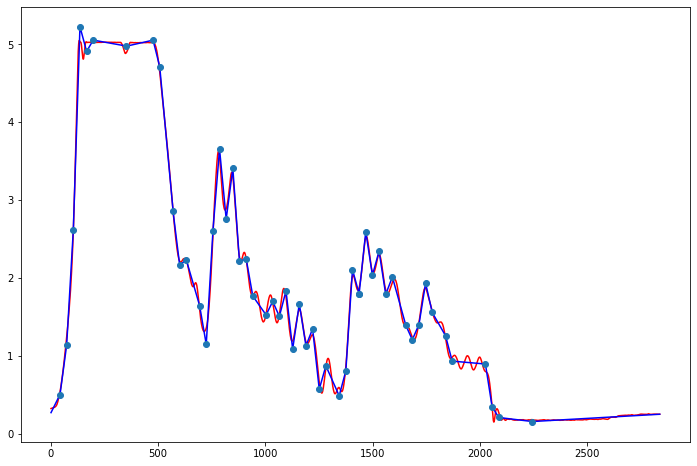

In [7]:
#Plot the model
plt.figure(figsize=(12,8))
plt.plot(x,lever,'r')
plt.plot(x,y_hat,'b')
plt.plot(knots, model.predict(knots), 'o')
plt.show()

In [8]:
vel = np.gradient(y_hat)
acc = np.gradient(vel)
vel2 = np.diff(y_hat, append=y_hat[-1])
acc2 = np.diff(vel2, append=vel2[-1])

peaks, _ = find_peaks(np.abs(acc), height=0.003, distance=20)
peaks2, _ = find_peaks(np.abs(acc2), height=0.005, distance=20)

print(len(peaks))

45


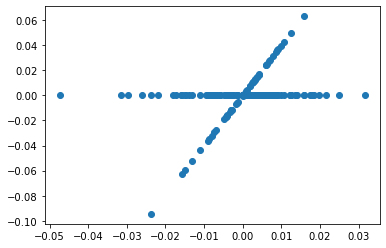

In [9]:
plt.scatter(acc, acc2)

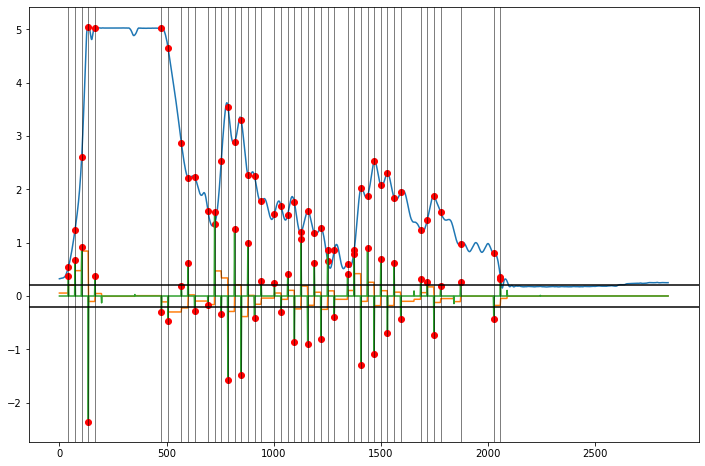

In [10]:
plt.figure(figsize=(12,8))
plt.plot(x,lever)
# plt.plot(x,y_hat)
plt.plot(peaks, lever[peaks], 'or')
# plt.plot(peaks2, lever[peaks2], 'ob')
plt.plot(x, 10*vel)
# plt.plot(x, 50*acc2, 'b')
plt.plot(x, 50*acc)
plt.plot(peaks, 50*acc[peaks], 'or')
plt.axhline(50*0.004, color='k')
plt.axhline(50*-0.004, color='k')
for i in range(len(peaks)):
    plt.axvline(peaks[i], color='k', linewidth=0.5)
plt.show()

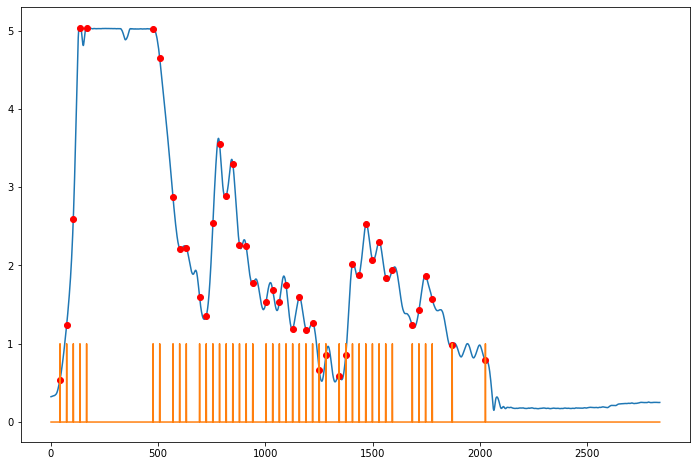

In [11]:
movement = np.zeros(len(peaks)-1)
for i in range(len(peaks)-1):
    movement[i] = abs(lever[peaks[i+1]] - lever[peaks[i]])
    
movement_signal = np.zeros(len(lever))
movement_signal[peaks[:-1]] = movement

large_thresh = 0

movement_signal_large = movement_signal > large_thresh

plt.figure(figsize=(12,8))
plt.plot(lever)
plt.plot(np.where(movement_signal > large_thresh)[0], lever[np.where(movement_signal > large_thresh)[0]], 'or')
plt.plot(movement_signal_large)
plt.show()

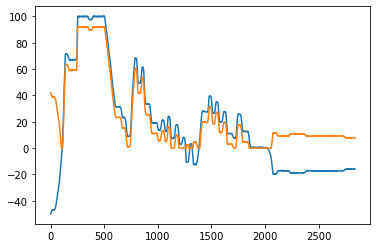

In [12]:
motor = Traces[0,0]['Motor'][0,idx].flatten()
distance_to_target = np.maximum(np.abs(motor)-8, 0)
distance_to_target_movement = distance_to_target[peaks[:-1]]

plt.plot(motor)
plt.plot(distance_to_target)
plt.show()

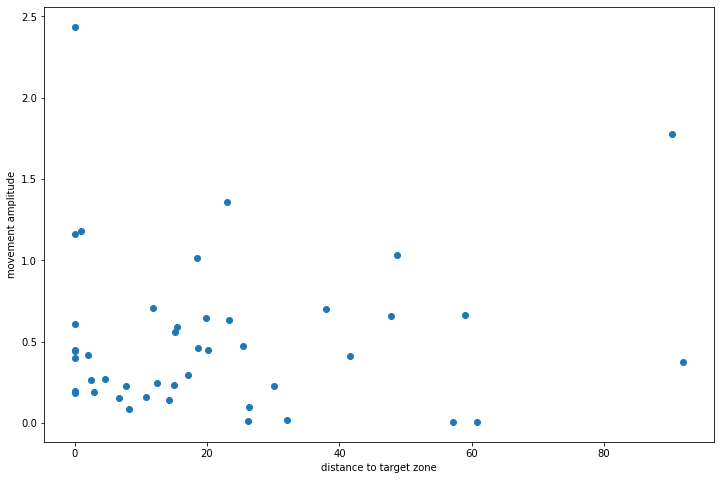

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(distance_to_target_movement, movement)
plt.xlabel("distance to target zone")
plt.ylabel("movement amplitude")
plt.show()

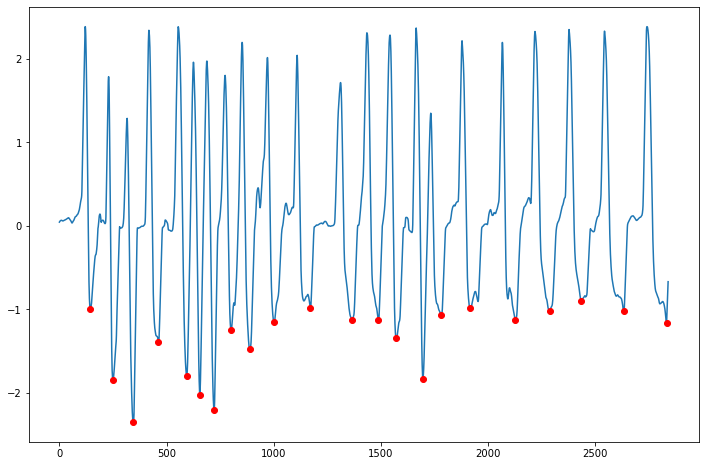

In [14]:
# process respiration
resp = Traces[0,0]['Sniffs'][0,idx].flatten()
trial_on = Traces[0,0]['Trial'][0,idx].flatten()

windowsize = 15
resp = resp - np.median(resp)
resp = -resp
resp = np.convolve(resp, np.ones(windowsize), 'same') / windowsize

resp_pks_2, _ = find_peaks(-resp, prominence=0.3, height=0.2, distance=20)

plt.figure(figsize=(12,8))
plt.plot(resp)
plt.plot(resp_pks_2, resp[resp_pks_2], 'or')
plt.show()

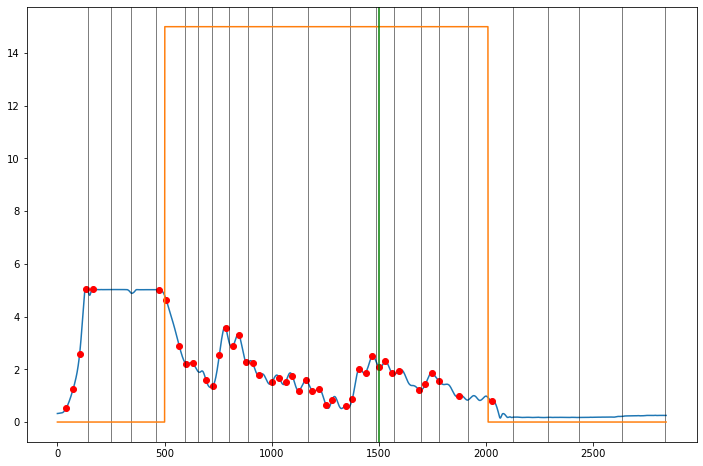

In [15]:
plt.figure(figsize=(12,8))
plt.plot(lever)
plt.plot(np.where(movement_signal > large_thresh)[0], lever[np.where(movement_signal > large_thresh)[0]], 'or')
for i in range(len(resp_pks_2)):
    plt.axvline(resp_pks_2[i], color='k', linewidth=0.5)
plt.plot(5*trial_on)
plt.axvline(1500, color='g')
plt.show()

In [16]:
sniff_intervals = np.diff(resp_pks_2)

move_sniff_trial = np.empty((len(resp_pks_2)-1, 600))
move_sniff_trial[:] = np.nan

for start_idx in range(len(resp_pks_2)-1):
    if trial_on[resp_pks_2[start_idx]] != 0 and resp_pks_2[start_idx] <= 1500: 
        move_sniff_trial[start_idx,:sniff_intervals[start_idx]+50] = movement_signal_large[resp_pks_2[start_idx]-50:resp_pks_2[start_idx+1]]

In [17]:
sniff_trial_lengths = np.sum(~np.isnan(move_sniff_trial), 1)
a_order_trial = np.argsort(sniff_trial_lengths)[::-1]
move_sniff_trial_sorted = move_sniff_trial[a_order_trial,:]

# move_sniff_trial_sorted = move_sniff_trial
move_sniff_trial_sorted_valid = move_sniff_trial_sorted[~np.isnan(move_sniff_trial_sorted).all(axis=1),:]
sniff_trial_lengths_valid = sniff_trial_lengths[sniff_trial_lengths != 0] - 50


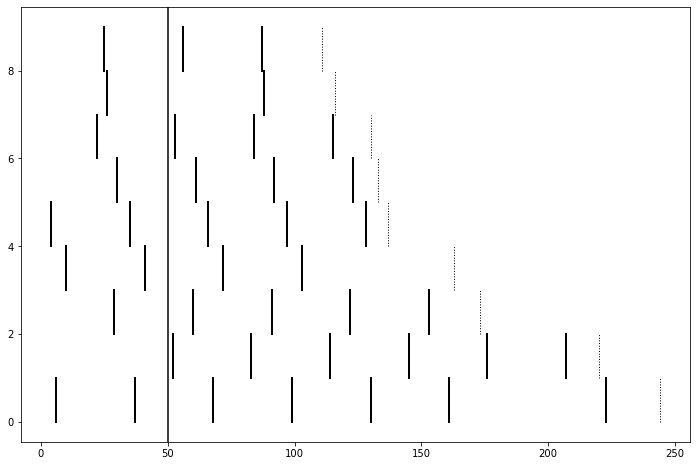

9


In [18]:
plt.figure(figsize=(12,8))
for i in range(move_sniff_trial_sorted_valid.shape[0]):
    moves = np.where(move_sniff_trial_sorted_valid[i,:] == 1)[0]
    for j in range(len(moves)):
        plt.plot((moves[j], moves[j]), (i, i+1), 'k', linewidth=2)
    trial_off = np.sum(~np.isnan(move_sniff_trial_sorted_valid[i,:]))
    plt.plot((trial_off, trial_off), (i, i+1), ':k', linewidth=1)
plt.axvline(50, color='k')
plt.show()
print(move_sniff_trial_sorted_valid.shape[0])

In [19]:
Traces[0,0]['Lever'].shape[1]

423

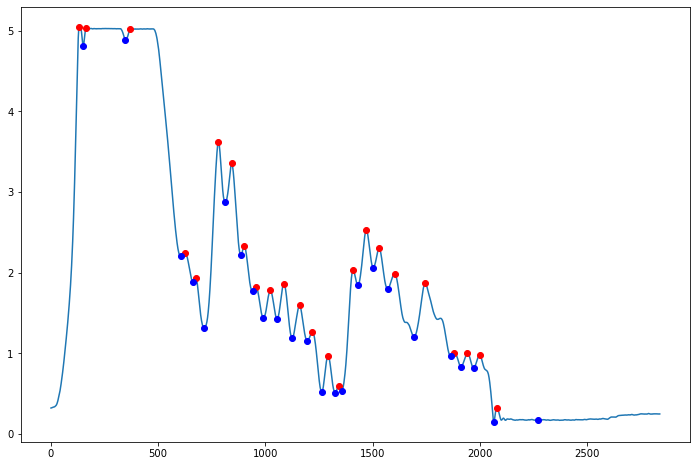

In [25]:
pks1, _ = find_peaks(lever, prominence=0.03, distance=5)
pks2, _ = find_peaks(-lever, prominence=0.03, distance=5)
plt.figure(figsize=(12,8))
plt.plot(lever)
plt.plot(pks1, lever[pks1], 'or')
plt.plot(pks2, lever[pks2], 'ob')